### OneR algorithm

In [15]:
import pandas as pd
import numpy as np
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import plot_tree
from IPython.display import Image
import copy



In [16]:
X_train = pd.read_csv("X_train.csv", sep = ',')
y_train = pd.read_csv("y_train.csv", sep = ',')
X_test = pd.read_csv("X_test.csv", sep = ',')
y_test = pd.read_csv("y_test.csv", sep = ',')

merged_train_data = pd.concat([X_train, y_train], axis=1)
train_data = merged_train_data

merged_test_data = pd.concat([X_test, y_test], axis=1)
test_data = merged_test_data

In [17]:
oneR_train_data = copy.deepcopy(train_data)

In [18]:
def get_predictor_value(dataframe, column, predicted_variable):
    split = (dataframe[column][dataframe[predicted_variable] == 0].mean() + dataframe[column][dataframe[predicted_variable] == 1].mean())/2
    group = dataframe[dataframe[column] > split].groupby(predicted_variable).size()
    left = 0
    right = 0
    if len(group) > 1:
        if group.get(0, 0) > group.get(1, 0):
            left = 1
            right = 0
        else:
            left = 0
            right = 1

    return split, left, right

In [19]:
def oneR(train_data, column, data, predicted_variable):
    train_data.loc[train_data[column] < data[0], 'temp'] = data[1]
    train_data.loc[train_data[column] >= data[0], 'temp'] = data[2]
    accuracy = accuracy_score(train_data[predicted_variable], train_data['temp'])
    precision = precision_score(train_data[predicted_variable], train_data['temp'], zero_division=1)
    recall = recall_score(train_data[predicted_variable], train_data['temp'])
    total=(accuracy + precision + recall) / 3
    
    return [accuracy, precision, recall, total, train_data]

In [20]:
predicted_variable = 'ack'

best_accuracy = 0 
for column in oneR_train_data.columns:
    if column == predicted_variable:
        continue
    data = get_predictor_value(oneR_train_data, column, predicted_variable)
    accuracy_values = oneR(oneR_train_data, column, data, predicted_variable)

    train_data = accuracy_values[4]
    train_data.drop('temp', axis=1, inplace=True)
    

    if accuracy_values[3] > best_accuracy:
        best_column = column
        best_accuracy = accuracy_values[3]
        best_column_metrics = accuracy_values


print('best column from oneR: ' + best_column)
print('total: ' + str(best_column_metrics[3]))
print('accuracy: ' + str(best_column_metrics[0]))
print('precision: ' + str(best_column_metrics[1]))
print('recall: ' + str(best_column_metrics[2]))



best column from oneR: page_activity_duration
total: 0.900567200058147
accuracy: 0.8994723687864482
precision: 0.8568387440127727
recall: 0.9453904873752202


In [21]:
results = []
explored_columns = []

for _ in range(3):
    best_accuracy = 0.5
    current_data = oneR_train_data.copy()  # Create a copy for each iteration
    for column in current_data.columns:
        if column == predicted_variable or column in explored_columns:
            continue
        data = get_predictor_value(current_data, column, predicted_variable)
        accuracy_values = oneR(current_data, column, data, predicted_variable)

        if accuracy_values[3] > best_accuracy:
            best_column = column
            best_accuracy = accuracy_values[3]
            best_column_metrics = accuracy_values
            oneR_train_data = accuracy_values[4]
            result = accuracy_values[4]['temp'].tolist()

    print('best column from oneR: ' + best_column + ' accuracy: ' + str(best_accuracy))  
    explored_columns.append(best_column)
    results.append(result)
    oneR_train_data = current_data.drop(['temp', best_column], axis=1)

final_values = []
for col in zip(*results):
    count_0 = col.count(0)
    count_1 = col.count(1)
    final_value = 0 if count_0 > count_1 else 1
    final_values.append(final_value)

for each in results:
    print(each)

    
predicted = oneR_train_data[predicted_variable].tolist()
accuracy = accuracy_score(predicted, final_values)
precision = precision_score(oneR_train_data[predicted_variable], final_values, zero_division=1)
recall = recall_score(oneR_train_data[predicted_variable], final_values)

print("accuracy: " + str(accuracy))
print("precision: " + str(precision))
print("recall: " + str(recall))

best column from oneR: page_activity_duration accuracy: 0.900567200058147
best column from oneR: pct_doubleclick accuracy: 0.6204705641756879
best column from oneR: race_0 accuracy: 0.6078376670143046
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0

In [22]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)

# Calculate precision
precision = precision_score(y_test, predictions)

# Calculate recall
recall = recall_score(y_test, predictions)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

C:\Users\default.LAPTOP-E7URUV4I\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Accuracy: 0.96
Precision: 0.94
Recall: 0.98


In [25]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=1)

# Train the Gradient Boosting model
gb_model.fit(X_train, y_train)

# Predict on the test set
gb_y_pred = gb_model.predict(X_test)

# Evaluate the Gradient Boosting model
gb_accuracy = accuracy_score(y_test, gb_y_pred)
print(f"Accuracy of Gradient Boosting on the test set: {gb_accuracy}")

c:\Users\default.LAPTOP-E7URUV4I\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of Gradient Boosting on the test set: 0.9622641509433962


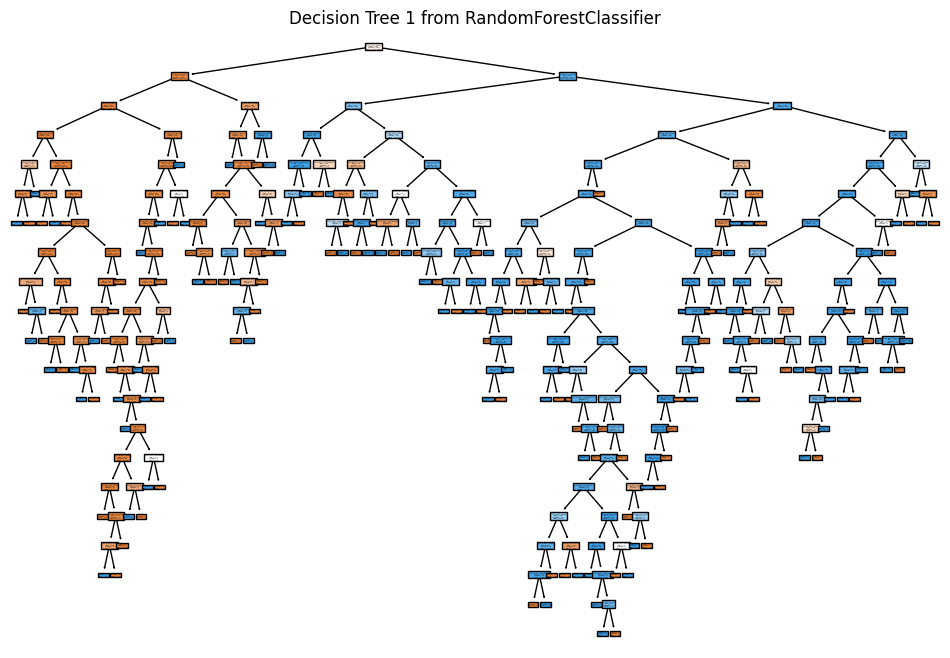

In [24]:
tree_index = 0
plt.figure(figsize=(12, 8))
plot_tree(clf.estimators_[tree_index], filled=True, feature_names=[f"feature_{i}" for i in range(X_test.shape[1])])
plt.title(f"Decision Tree {tree_index + 1} from RandomForestClassifier")
plt.show()

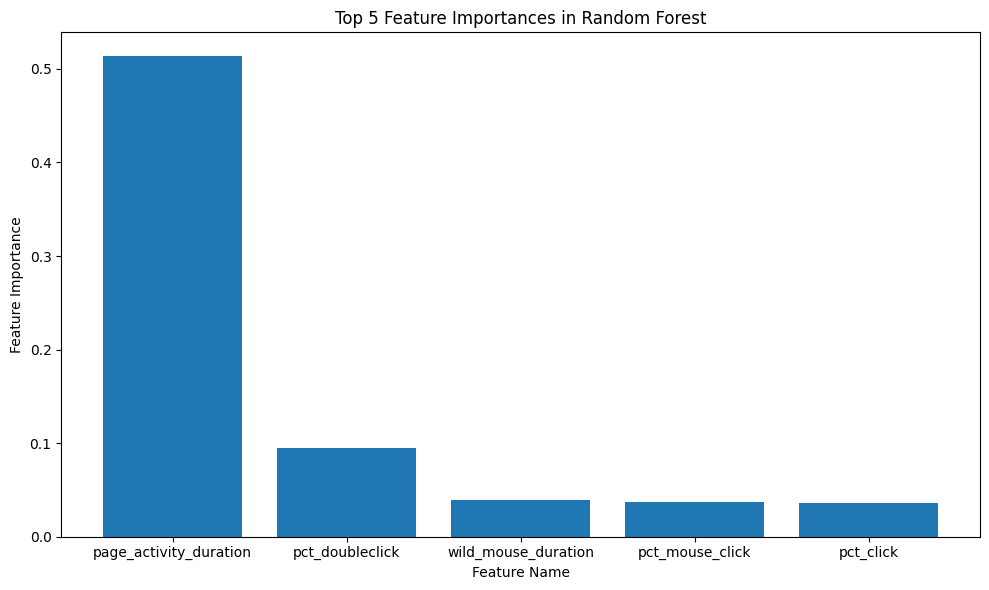

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Get feature importances from the Random Forest model
feature_importances = clf.feature_importances_

# Get the indices that would sort the feature importances array
sorted_indices = np.argsort(feature_importances)[::-1]

# Select the top 5 feature indices and their importances
top_5_indices = sorted_indices[:5]
top_5_importances = feature_importances[top_5_indices]

# Assuming you have a list of column names called feature_names
feature_names = X_test.columns.values

# Get the names of the top 5 features
top_5_feature_names = [feature_names[i] for i in top_5_indices]

# Visualize only the top 5 feature importances with column names
plt.figure(figsize=(10, 6))
plt.bar(range(len(top_5_indices)), top_5_importances, align='center')
plt.xticks(range(len(top_5_indices)), top_5_feature_names)  # Set the feature names as x-axis ticks
plt.xlabel('Feature Name')
plt.ylabel('Feature Importance')
plt.title('Top 5 Feature Importances in Random Forest')
plt.tight_layout()
plt.show()
